In [1]:
import pickle
import pandas as pd
import time
from tqdm import tqdm
import yfinance as yf

In [ ]:
symbol = 'VGWL.DE'
x = 'USDPLN'

eurpln = yf.Ticker(f"{x}=X").history(start='1900-01-01', end='2025-08-23', interval='1d')['Close'].reset_index()
eurpln['Date'] = eurpln['Date'].apply(lambda el: el.strftime('%Y-%m-%d'))
eurpln.index = pd.DatetimeIndex(eurpln['Date'])
eurpln = eurpln['Close']

etf = yf.Ticker(symbol).history(start='1900-01-01', end='2025-08-23', interval='1d')['Close'].reset_index()
etf['Date'] = etf['Date'].apply(lambda el: el.strftime('%Y-%m-%d'))
etf.index = pd.DatetimeIndex(etf['Date'])
etf = etf[['Close']]

data = etf.merge(eurpln, how='left', on='Date').rename(columns={'Close_x': symbol, 'Close_y': x})
data[f'{symbol}_PLN'] = data[symbol]*data[x]

<Axes: xlabel='Date'>

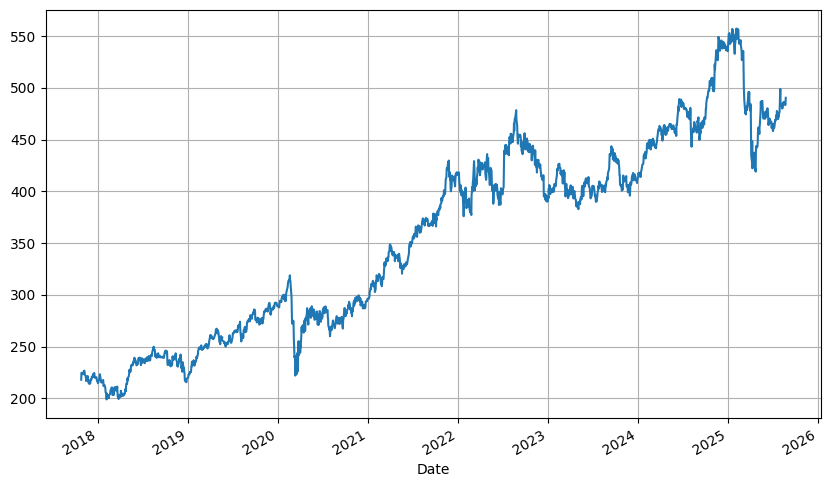

In [111]:
y = data[f'{symbol}_PLN']

y.plot(figsize=(10, 6), grid=True)

In [110]:
przewalutowanie = 0.005
TER = 0.0022

print(f'Zwrot od początku (co miesiąc zamykamy i otwieramy): {(1 + y.resample('ME').last().pct_change() - przewalutowanie - TER/12).prod():.2%}')
print(f'Zwrot od początku (co kwartał zamykamy i otwieramy): {(1 + y.resample('QE').last().pct_change() - przewalutowanie - TER/4).prod():.2%}')
print(f'Zwrot od początku (co roku zamykamy i otwieramy): {(1 + y.resample('YE').last().pct_change() - przewalutowanie - TER).prod():.2%}')
print(f'Zwrot od początku (buy and hold): {(y.iloc[-1]/y.iloc[0] - 1):.2%}')

Zwrot od początku (co miesiąc zamykamy i otwieramy): 134.75%
Zwrot od początku (co kwartał zamykamy i otwieramy): 182.29%
Zwrot od początku (co roku zamykamy i otwieramy): 204.66%
Zwrot od początku (buy and hold): 120.56%
